![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# Bank Data - Data Preprocessing

Michael Murphy

Marc Maycas 

## Setting up

In [1]:
import pandas as pd
import numpy as np

df_bank = pd.read_csv('./data/churn_data_before_processing.csv', sep = ",", index_col = 0)

`df_bank` is a Pandas Dataframe containing all details from the bank's customer database. By visually inspecting the csv file, it makes sense to use the unnamed first column as the index

In [2]:
df_bank

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,NaN,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,3613,15792151,Hamilton,635.0,Spain,Female,37.0,3.0,0.00,2.0,1.0,0.0,91086.73,0
4437,4438,15779522,Efimov,736.0,France,Female,24.0,0.0,0.00,2.0,1.0,0.0,109355.73,1
6549,6550,15792029,Lee,620.0,France,Male,32.0,6.0,0.00,2.0,1.0,0.0,56139.09,0
4590,4591,15680167,Thomson,635.0,France,Female,78.0,6.0,47536.40,1.0,NaN,1.0,119400.08,0


In [3]:
df_bank.shape

(10150, 14)

In [4]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10150 entries, 0 to 8
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10150 non-null  int64  
 1   CustomerId       10150 non-null  int64  
 2   Surname          10056 non-null  object 
 3   CreditScore      10132 non-null  float64
 4   Geography        9954 non-null   object 
 5   Gender           9867 non-null   object 
 6   Age              9879 non-null   float64
 7   Tenure           10070 non-null  float64
 8   Balance          9994 non-null   float64
 9   NumOfProducts    9862 non-null   float64
 10  HasCrCard        10067 non-null  float64
 11  IsActiveMember   10063 non-null  float64
 12  EstimatedSalary  10106 non-null  float64
 13  Exited           10150 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 1.2+ MB


In [5]:
# checking nulls globally
df_bank.isna().sum()

RowNumber            0
CustomerId           0
Surname             94
CreditScore         18
Geography          196
Gender             283
Age                271
Tenure              80
Balance            156
NumOfProducts      288
HasCrCard           83
IsActiveMember      87
EstimatedSalary     44
Exited               0
dtype: int64

There are several columns with Null values that will require treatment

## Data Pre-processing

Initial observation of the table: we have approx 10k samples of what appears to be customer data relating to financial concepts. There are no time based fields or product related IDs so we can assume there should be one row per customer. 

Columns like geography and gender look like simple cases for categorical one-hot encoding. Several columns in the dataframe look like they might unecessarily be assigned as floats. Of all the columns, "isActiveMember" and "Exited" are those which will need to be further explored once the data is cleaned as the concepts are not clear (the first 4 rows present every combination between the two columns, so somehow an active member can also be exited).

We will check the duplicates and columns one by one to verify these assumptions and prepare the dataset for further analysis.

### 1 - Duplicates existence

Are there any duplicate records in df_bank?

In [6]:
# check and show duplicates
duplicates = df_bank[df_bank.duplicated(keep = False)]
duplicates

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8,9,15792365,He,501.0,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0
151,152,15759618,Alexeeva,535.0,France,Female,48.0,9.0,0.00,1.0,1.0,0.0,149892.79,1
227,228,15676895,Cattaneo,547.0,Germany,Female,39.0,6.0,74596.15,3.0,1.0,1.0,85746.52,1
326,327,15601848,Scott,594.0,France,Male,35.0,2.0,0.00,2.0,1.0,0.0,103480.69,0
410,411,15566594,McKenzie,709.0,Spain,Male,23.0,10.0,0.00,2.0,0.0,0.0,129590.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,6524,15806249,Kerr,671.0,Spain,Female,31.0,4.0,0.00,2.0,0.0,1.0,79270.02,0
3612,3613,15792151,Hamilton,635.0,Spain,Female,37.0,3.0,0.00,2.0,1.0,0.0,91086.73,0
4437,4438,15779522,Efimov,736.0,France,Female,24.0,0.0,0.00,2.0,1.0,0.0,109355.73,1
6549,6550,15792029,Lee,620.0,France,Male,32.0,6.0,0.00,2.0,1.0,0.0,56139.09,0


In [7]:
# checking a couple of examples of these duplicated rows
df_bank[df_bank.RowNumber == 9]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8,9,15792365,He,501.0,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.5,0
8,9,15792365,He,501.0,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.5,0


In [8]:
df_bank[df_bank.RowNumber == 228]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
227,228,15676895,Cattaneo,547.0,Germany,Female,39.0,6.0,74596.15,3.0,1.0,1.0,85746.52,1
227,228,15676895,Cattaneo,547.0,Germany,Female,39.0,6.0,74596.15,3.0,1.0,1.0,85746.52,1


There are 208 duplicate entries, that need to be removed, but keeping the first entry as they contain valuable data.

In [9]:
# removing duplicates
df_bank.drop_duplicates(keep = "first", inplace = True)

In [10]:
# checking if duplicates have been removed
df_bank[df_bank.duplicated(keep = False)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


All duplicates have been removed

In [11]:
df_bank.shape

(10046, 14)

Removing duplicates left `df_bank` with 10046 entries out from the 10150 we had at the beginning (removed around 1% of entries)

### 2 - Univariate Analysis and Outlier detection

Exploring all columns' data to:
- Check and understand the data
- Remove or fill in NaN's or missing values
- Remove possible outliers.

#### Column `RowNumber`

##### Analysis and missing values

`RowNumber` is a numerical field that identifies the line number for each entry without using the zero indexing feature. At a first glance looks like a poor usage of memory, but we need to analyse it further, just in case.

In [12]:
df_bank.RowNumber.isna().any()

False

There are no missing values or NaN.

Let's check its values:

In [13]:
df_bank.RowNumber.value_counts(dropna = False)

2106     2
5304     2
9431     2
5830     2
8932     2
        ..
3345     1
3346     1
3347     1
3348     1
10000    1
Name: RowNumber, Length: 10000, dtype: int64

In [14]:
# there are several duplicate values in the column, checking some of these entries
df_bank.loc[df_bank["RowNumber"].isin([2106, 5304, 9431, 5830, 8932])].sort_values(by = "RowNumber")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2105,2106,15615096,Costa,492.0,France,Female,NaN,7.0,0.00,2.0,1.0,1.0,49463.44,0
2105,2106,15615096,Costa,492.0,France,Female,31.0,7.0,NaN,2.0,1.0,1.0,49463.44,0
5303,5304,15645766,Kosisochukwu,634.0,Spain,Male,25.0,9.0,0.00,2.0,1.0,1.0,8227.91,0
5303,5304,15645766,Kosisochukwu,634.0,Spain,Male,25.0,9.0,0.00,NaN,1.0,1.0,8227.91,0
5829,5830,15794266,Cross,559.0,France,NaN,32.0,9.0,145303.52,1.0,1.0,0.0,103560.98,0
5829,5830,15794266,Cross,559.0,France,Male,32.0,9.0,145303.52,1.0,1.0,0.0,103560.98,0
8931,8932,15761487,Yefimova,678.0,NaN,Female,55.0,5.0,0.00,1.0,0.0,1.0,196794.11,1
8931,8932,15761487,Yefimova,678.0,France,Female,55.0,5.0,0.00,1.0,0.0,1.0,196794.11,1
9430,9431,15591980,Hill,753.0,France,Male,33.0,5.0,122568.05,2.0,1.0,1.0,82820.85,0
9430,9431,15591980,Hill,753.0,France,Male,NaN,5.0,122568.05,2.0,1.0,1.0,82820.85,0


The dataset contains duplicate indices, which means that there's still some duplicate data. By inspecting the previous entries, we see that these refer to the same CustomerId, and the column that we used as an index is also repeated, which means several things:

- It is required to further study what to do with these duplicated entries as it seems that several data columns are equal per row, but other fields have NaNs that can be merged to turn these 2 entries into a single complete one. The candidate column to merge by will be the `CustomerId` as it seems to be unique and common for both duplicated entries (as we will analyse in the upcoming cells). For example, with `CustomerId` = 15615096 (`Surname = "Costa"`), the first age entry (NaN) can be merged with the second (31.0), as well as the balance from the first entry (0.00) can be merged into the second (NaN). We also have no fields (time, product id) which could make us think there should be more than one row per customer.
- We need to reset the indices to have unique indices for each table entry
- Definitely remove this column as it's not providing any relevance into our dataset and is doing a poor memory usage

In [15]:
# checking if customerId is a suitable column to use to merge these values
df_bank.CustomerId.isna().any()

False

No missing values in `CustomerId`.

In [16]:
df_bank.CustomerId.value_counts(dropna = False)

15615096    2
15645766    2
15591980    2
15794266    2
15761487    2
           ..
15654292    1
15648320    1
15726747    1
15694510    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64

In [17]:
# checking some of these duplicated entries
df_bank.loc[df_bank["CustomerId"].isin([15615096, 15645766, 15591980, 15761487])].sort_values(by = "CustomerId")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9430,9431,15591980,Hill,753.0,France,Male,33.0,5.0,122568.05,2.0,1.0,1.0,82820.85,0
9430,9431,15591980,Hill,753.0,France,Male,NaN,5.0,122568.05,2.0,1.0,1.0,82820.85,0
2105,2106,15615096,Costa,492.0,France,Female,NaN,7.0,0.00,2.0,1.0,1.0,49463.44,0
2105,2106,15615096,Costa,492.0,France,Female,31.0,7.0,NaN,2.0,1.0,1.0,49463.44,0
5303,5304,15645766,Kosisochukwu,634.0,Spain,Male,25.0,9.0,0.00,2.0,1.0,1.0,8227.91,0
5303,5304,15645766,Kosisochukwu,634.0,Spain,Male,25.0,9.0,0.00,NaN,1.0,1.0,8227.91,0
8931,8932,15761487,Yefimova,678.0,NaN,Female,55.0,5.0,0.00,1.0,0.0,1.0,196794.11,1
8931,8932,15761487,Yefimova,678.0,France,Female,55.0,5.0,0.00,1.0,0.0,1.0,196794.11,1


It seems that we are facing the same issue as with `RowNumber` and we are getting the same duplicates. So we can use `CustomerId` as we want to remove the `RowNumber` column

In [18]:
# merging values from both rows and keeping only the filled in values and reseting the indices
# grouping by customerId as it is the unique identifier per each bank client
df_bank = df_bank.groupby("CustomerId").first().sort_values(by = "CustomerId", ascending = False).reset_index()
df_bank.loc[df_bank["RowNumber"].isin([2106, 5304, 9431, 5830, 8932])].sort_values(by = "RowNumber")

,CustomerId,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8045,15615096,2106,Costa,492.0,France,Female,31.0,7.0,0.00,2.0,1.0,1.0,49463.44,0
6806,15645766,5304,Kosisochukwu,634.0,Spain,Male,25.0,9.0,0.00,2.0,1.0,1.0,8227.91,0
850,15794266,5830,Cross,559.0,France,Male,32.0,9.0,145303.52,1.0,1.0,0.0,103560.98,0
2179,15761487,8932,Yefimova,678.0,France,Female,55.0,5.0,0.00,1.0,0.0,1.0,196794.11,1
8968,15591980,9431,Hill,753.0,France,Male,33.0,5.0,122568.05,2.0,1.0,1.0,82820.85,0


We can see that the previous pseudo-duplicates have been merged into one single entry with no NaN's

In [19]:
df_bank.shape

(10000, 14)

The dataframe has been reduced to 10000 (around 1.47% reduction of entries after these issues have been resolved)

In [20]:
# dropping RowNumber as a column
df_bank.drop(columns = ["RowNumber"], inplace = True)
df_bank

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15815690,Akabueze,614.0,Spain,Female,40.0,3.0,113348.50,1.0,1.0,1.0,77789.01,0
1,15815660,Mazzi,758.0,France,Female,34.0,1.0,154139.45,1.0,1.0,1.0,60728.89,0
2,15815656,Hopkins,541.0,Germany,Female,39.0,9.0,100116.67,1.0,1.0,1.0,199808.10,1
3,15815645,Akhtar,481.0,France,None,37.0,8.0,152303.66,2.0,1.0,1.0,175082.20,0
4,15815628,Moysey,711.0,France,Female,37.0,8.0,113899.92,1.0,0.0,0.0,80215.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15565796,Docherty,745.0,Germany,Male,48.0,10.0,96048.55,1.0,1.0,0.0,74510.65,0
9996,15565779,Kent,627.0,Germany,Female,30.0,6.0,57809.32,1.0,1.0,0.0,188258.49,0
9997,15565714,Cattaneo,601.0,France,Male,47.0,1.0,64430.06,2.0,0.0,1.0,96517.97,0
9998,15565706,Akobundu,612.0,Spain,Male,35.0,1.0,0.00,1.0,1.0,1.0,83256.26,1


#### Column `CustomerId`

##### Analysis and missing values

As seen before, `CustomerId` is the unique bank customer identifier unequivocally within the dataset.

In [21]:
df_bank.CustomerId.isna().any()

False

There are no missing values in `CustomerId`, as we have seen before.

In [22]:
df_bank.CustomerId.value_counts(dropna = False)

15815690    1
15649211    1
15649379    1
15649359    1
15649354    1
           ..
15732265    1
15732235    1
15732202    1
15732199    1
15565701    1
Name: CustomerId, Length: 10000, dtype: int64

In [23]:
df_bank.CustomerId.is_unique

True

All values are unique now, after the merge we did before.

##### Outliers

As it's an internal ID in a database, it doesn't require the analysis of any outliers.

#### Column `Surname`

##### Analysis and missing values

`Surname` identifies the last name of the bank customer. It is of type object (even though it's referring to a string in this case) and it can have repeated values as Last Names can be repeated between different people. It can be interpreted of categorical as there are several repeated last names that can be grouped together.

In [24]:
df_bank.Surname

0       Akabueze
1          Mazzi
2        Hopkins
3         Akhtar
4         Moysey
          ...   
9995    Docherty
9996        Kent
9997    Cattaneo
9998    Akobundu
9999       Ferri
Name: Surname, Length: 10000, dtype: object

In [25]:
df_bank.Surname.value_counts(dropna = False)

NaN         92
Smith       32
Martin      29
Scott       29
Walker      28
            ..
Whiddon      1
Streeton     1
Morey        1
Mosman       1
Toosey       1
Name: Surname, Length: 2926, dtype: int64

In [26]:
# checking NaN
df_bank[df_bank.Surname.isna()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
68,15813871,None,690.0,France,Male,47.0,2.0,0.00,2.0,1.0,0.0,151375.73,0
176,15811314,None,589.0,Germany,Female,36.0,9.0,140355.56,NaN,1.0,0.0,136329.96,0
248,15809585,None,646.0,France,Male,38.0,7.0,0.00,2.0,1.0,0.0,1528.40,0
260,15809263,None,729.0,Germany,Male,29.0,5.0,109676.52,1.0,1.0,1.0,25548.47,0
288,15808566,None,516.0,France,Male,46.0,2.0,0.00,2.0,1.0,1.0,169122.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,15581388,None,487.0,Spain,Male,33.0,8.0,145729.71,1.0,1.0,0.0,41365.85,0
9491,15579040,None,556.0,France,Female,46.0,10.0,0.00,2.0,0.0,0.0,109184.24,0
9514,15578462,None,596.0,Spain,Female,76.0,9.0,134208.25,1.0,1.0,1.0,13455.43,0
9728,15572657,None,472.0,France,Male,29.0,8.0,102490.27,1.0,0.0,1.0,181224.56,0


Nulls represent different customers as these are identified by its unique `CustomerId`. 

We have 2 options here:
- Fill in those null values with an empty string
- Remove the column 

We have decided to finally keep the column and fill in the nulls, to see if a model can provide us something back from the origin of those surnames. The nulls will be filled with `NotReported`.

In [27]:
# filling in Surname NaN's
df_bank.loc[df_bank.Surname.isna(), "Surname"] = "NotReported"

In [28]:
df_bank.Surname.isna().sum()

0

##### Outliers

No need to analyse outliers with categorical variables

#### Column `CreditScore`

##### Analysis and missing values

`CreditScore` is a continuous numerical value between 300 - 850 that depicts a customer's creditworthiness. The higher the score, the better a borrower looks to potential lenders.

[More information on credit score](https://www.investopedia.com/terms/c/credit_score.asp)


In [29]:
# mean, median and quartiles
df_bank.CreditScore.describe()

count    9982.000000
mean      650.902076
std       100.409554
min       350.000000
25%       584.000000
50%       652.000000
75%       718.000000
max      2924.008649
Name: CreditScore, dtype: float64

From the description, we see that the minimum (350) is inside the 300 - 850 range, but the maximum 2924 is not (the decimal places also make it look erroneous), so we may have some outliers we'll analyze later. Nothing else looks weird by looking into the general data description.

In [30]:
# checking if there are any null values to transform
df_bank.CreditScore.isna().any()

True

In [31]:
print("There are", df_bank.CreditScore.isna().sum(), "NaN entries")

There are 18 NaN entries


In [32]:
df_bank[df_bank.CreditScore.isna()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
553,15801559,Chiang,NaN,Germany,Female,41.0,9.0,181461.48,3.0,1.0,1.0,NaN,1
604,15800482,Bradshaw,NaN,Spain,Female,33.0,7.0,0.00,2.0,1.0,1.0,168261.40,0
727,15797293,Sopuluchukwu,NaN,France,Female,25.0,3.0,0.00,2.0,1.0,0.0,179608.96,0
1088,15788556,Trouette,NaN,France,Female,42.0,4.0,148283.94,1.0,1.0,1.0,44692.63,1
1190,15785815,Toscano,NaN,Germany,Male,NaN,1.0,142631.54,2.0,1.0,1.0,175894.24,0
4087,15713608,Tuan,NaN,France,Female,41.0,5.0,0.00,2.0,1.0,1.0,34827.43,0
4385,15706021,Buley,NaN,France,Female,34.0,1.0,96645.54,2.0,0.0,0.0,171413.66,0
5056,15689425,Olejuru,NaN,Spain,Male,35.0,8.0,100988.39,2.0,1.0,0.0,22247.27,0
5717,15672640,Kambinachi,NaN,Spain,Female,45.0,4.0,114347.85,2.0,1.0,1.0,109089.04,0
5840,15669945,Jackson,NaN,France,Male,35.0,4.0,141359.37,NaN,1.0,0.0,NaN,0


Before filling in these values, we will check any outstanding outliers so we can get a proper mean or average to fill in.

Additionally, something interesting we've noticed is that, even though the CreditScore is defined as a float, all entries that are not NaN's have 0s in the decimal positions. So we are dealing with integers instead of floats, as it seems that the data source doesn't have a decimal resolution. This makes this variable a discrete numerical value instead of a continuous float number as we imagined at the beginning.

In [33]:
df_bank.loc[df_bank.CreditScore.notnull(), "CreditScore"].astype("str").str[-2:].value_counts()

.0    9980
52       1
72       1
Name: CreditScore, dtype: int64

We'll convert the type to an integer as soon as we finish our data processing

##### Outliers

From the description, anything below 300 and above 850 is incorrect and corresponds to an outlier, as it's incorrect. However, let's check how these look within the whole data set.

<AxesSubplot:>

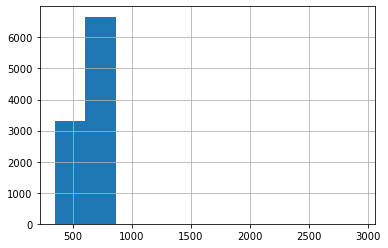

In [34]:
df_bank.CreditScore.hist()

Outliers can't be properly seen as there aren't many. Let's use a boxplot to better identify them.

<AxesSubplot:>

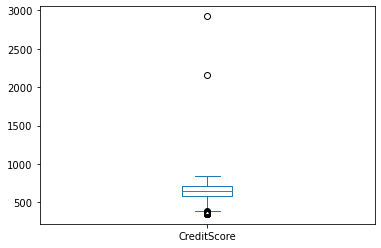

In [35]:
df_bank.CreditScore.plot(kind = "box")

In [36]:
df_bank[(df_bank.CreditScore > 850) | (df_bank.CreditScore < 300)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1553,15776631,Ma,2158.510025,France,Female,36.0,5.0,119540.15,1.0,0.0,1.0,80603.99,0
3502,15727619,Lock,2924.008649,Germany,Female,46.0,9.0,113909.69,3.0,1.0,0.0,92320.37,1


These 2 outliers seem to have other valuable data that we could use. We will fill the outliers and the nulls with the mean values of the other correct values within the interval. We will assign the mean (rather than median or other) as the distribution of correct values is reasonably symmetrical.

In [37]:
# filling NaN's
creditScore_mean = round(df_bank[df_bank.CreditScore.between(300, 850)].CreditScore.mean())
df_bank.CreditScore.fillna(creditScore_mean, inplace = True)

In [38]:
# removing outliers by filling in the mean of the creditScore entries with the right values (300, 850)
df_bank.loc[(df_bank.CreditScore > 850) | (df_bank.CreditScore < 300), "CreditScore"] = creditScore_mean

<AxesSubplot:>

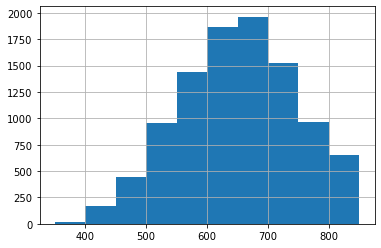

In [39]:
# checking data after outlier removal
df_bank.CreditScore.hist()

<AxesSubplot:>

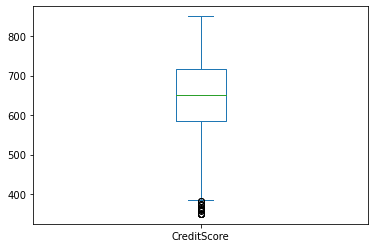

In [40]:
df_bank.CreditScore.plot(kind = "box")

According to the box plot, we may have some suspected outliers below 400 now:

In [41]:
df_bank[df_bank.CreditScore < 400].shape

(19, 13)

In [42]:
df_bank.CreditScore[df_bank.CreditScore < 400].min()

350.0

There are only 19 entries and also only 50 units below 400. For the time being, we will keep these suspected outliers as they are also fulfilling the definition of Credit Score that we've seen before. 

Now, we will transform the variable type into an integer.

In [43]:
df_bank.CreditScore = df_bank.CreditScore.astype("int")

In [44]:
# checking that we converted the values to integers
df_bank.CreditScore.value_counts()

850    231
651     70
678     63
655     54
667     53
      ... 
373      1
363      1
367      1
401      1
412      1
Name: CreditScore, Length: 460, dtype: int64

#### Column `Geography`

##### Analysis and missing values

`Geography` determines the country where the user lives in. It's a categorical variable with a set of fixed names for each country existing in the world.

In [45]:
df_bank.Geography.value_counts(dropna = False)

France     4924
Germany    2453
Spain      2432
NaN         191
Name: Geography, dtype: int64

<AxesSubplot:>

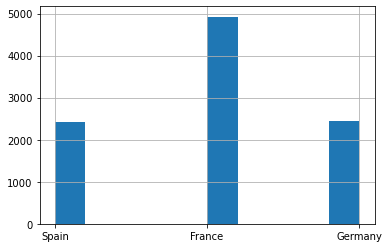

In [46]:
df_bank.Geography.hist()

The data set looks OK for countries France, Germany and Spain. Everything is grouped as it should. However, there are 191 NaN entries.

As there is no way we can input a user to a specific country, we will add a new category for non-reported countries as `"NotReported"`, so we can remove these NaN's, but use other data for analysis.

In [47]:
# filling in Geographical NaN
df_bank.loc[df_bank.Geography.isna(), "Geography"] = "NotReported"

In [48]:
df_bank.Geography.value_counts(dropna = False)

France         4924
Germany        2453
Spain          2432
NotReported     191
Name: Geography, dtype: int64

<AxesSubplot:>

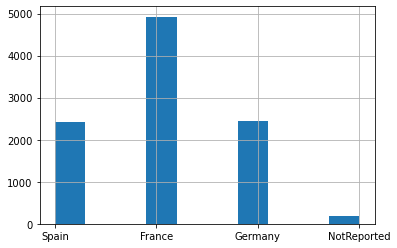

In [49]:
df_bank.Geography.hist()

##### Outliers

No need to review outliers from this categorical variable


#### Column `Gender`

##### Analysis and missing values

`Gender` identifies the gender of the bank customer. It should be a categorical variable with either `Male` or `Female`

In [50]:
df_bank.Gender.value_counts(dropna = False)

Male      5307
Female    4419
NaN        274
Name: Gender, dtype: int64

<AxesSubplot:>

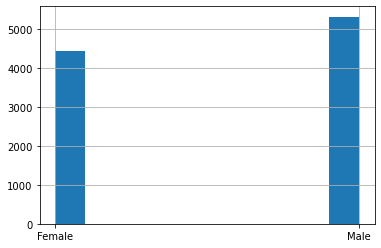

In [51]:
df_bank.Gender.hist()

Same as before, the 2 main categories, `Male` and `Female` are correctly tagged. However, we have several NaN that we can't fill a value in as we don't know the reason behind that. Maybe the customers don't identify themselves with that particular gender, they didn't want to specify it, or in fact, there's been an error when storing the values in the database. We will create a 3rd category calling it `NotSpecified` and fill all NaN's with it.

In [52]:
df_bank.loc[df_bank.Gender.isna(), "Gender"] = "NotSpecified"
df_bank.Gender.value_counts(dropna = False)

Male            5307
Female          4419
NotSpecified     274
Name: Gender, dtype: int64

<AxesSubplot:>

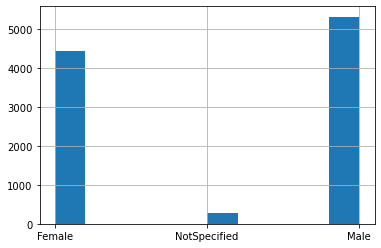

In [53]:
df_bank.Gender.hist()

The not specified Gender is a small category but it can't be ignored.

##### Outliers

No need to review outliers from this categorical variable

#### Column `Age`

##### Analysis and missing values

`Age` identifies how old the bank customer is. When inspecting the data it seems to be a continuous float variable.

In [54]:
df_bank.Age.describe()

count    9746.000000
mean       38.945208
std        10.559595
min       -49.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64

There are negative values in `Age` as specified in the minimum. The max looks quite high too but possible (as people can even live longer than 100 years), we'll know more when analysing the outliers.

In [55]:
# checking for NaN values
df_bank.Age.isna().any()

True

In [56]:
print("There are", df_bank.Age.isna().sum(), "NaN values")

There are 254 NaN values


We'll decide what to do with the values as soon as we check the outliers (which we suspect there are as we have negative values).

Additionally, in the same way as we identified with the `CreditScore`, even though the age is defined as a float, all entries that are not NaN's have 0s in the decimal positions. So we are dealing with integers instead of floats, as it seems that the data source doesn't have a "less than a year" resolution. This makes this variable a discrete numerical value instead of a continuous float number as we imagined at the beginning.

This has its advantages too as we are cleaning the data to train a model for churn analysis because we would expect to analyse churn in bins of ages, for example. ([More info](https://stackoverflow.com/questions/67329095/when-should-you-convert-age-column-in-float-or-int))

In [57]:
df_bank.Age.value_counts(dropna = False)

 37.0    467
 38.0    464
 35.0    463
 36.0    442
 34.0    430
        ... 
 83.0      1
 88.0      1
-23.0      1
 82.0      1
 85.0      1
Name: Age, Length: 73, dtype: int64

In [58]:
# checking that all ages end up with '.0'
df_bank.loc[df_bank.Age.notnull(), "Age"].astype("str").str[-2:].value_counts()

.0    9746
Name: Age, dtype: int64

##### Outliers

Before doing any data transformations, we will check the outliers

<AxesSubplot:>

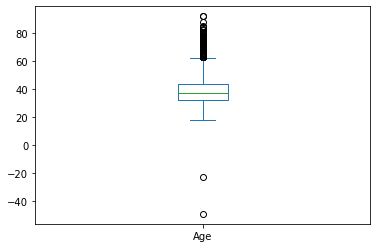

In [59]:
df_bank.Age.plot(kind = "box")

In [60]:
# function to check min and max limits from Q1 - 1.5 * IQR and Q2 + 1.5 * IQR 
def outlier_limits(df, col):
  iqr = df_bank[col].quantile(.75) - df_bank[col].quantile(.25)
  lower_limit = df_bank[col].quantile(.25) - 1.5 * iqr
  higher_limit = df_bank[col].quantile(.75) + 1.5 * iqr
  return (lower_limit, higher_limit)

In [61]:
outlier_limits(df_bank, 'Age')

(14.0, 62.0)

There are 2 clear ranges of outliers, the negative values (below 14) and the ones beyond 62. As we can see, the IQR is pretty thin and values go quite beyond that age, starting at 62. These can be dangerous as they can affect a model and need to be removed. At the same time these are realistic ages and there is a chance that they could be valuable to further analysis. For this task we will directly apply our calculated outlier limits, and replace all ages that exceed this range. We will use the age median to replace outliers due to the asymmetrical distribution.

In [62]:
age_median = df_bank.Age[(df_bank.Age >= 14) & (df_bank.Age <= 63)].median() # rounding median as we will convert it to integers instead of floats
age_median

37.0

In [63]:
# filling outliers
df_bank.loc[((df_bank.Age < 14) | (df_bank.Age > 63)), "Age"] = age_median

In [64]:
# filling in null values
df_bank.Age.fillna(age_median, inplace = True)

In [65]:
df_bank.Age.isna().any()

False

No null values left

<AxesSubplot:>

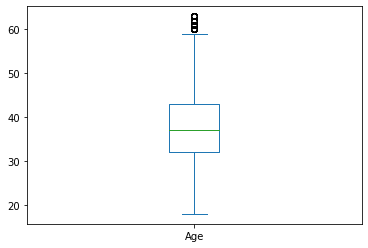

In [66]:
df_bank.Age.plot(kind = "box")

In [67]:
outlier_limits(df_bank, 'Age')

(15.5, 59.5)

In [68]:
len(df_bank.Age[df_bank.Age > 59.5])

205

After applying the correction, the 1.5 * IQR range has been modified and new outliers appeared above 59.5. However, the gain we have to correct those will lead us to reducing the IQR and produce new outliers. In this case, we believe that since these are pretty close to the 1.5 IQR range, we can keep them. In case these affected a model we would deal with those later. Plus these are only 205 / 10000 samples, which represent a ~2% of the sample size.

Now we will convert the float64 values into integers as discussed before. Moreover, we will also convert them to the type `int8` so we can save memory usage too.

The max value for `int8` is `127` which covers all possible ages for a human being, so it's safe to use it (the oldest person ever until year 2021 has been [Jeanne Calment, living up to 122 years](https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people)).

In [69]:
df_bank.Age = df_bank.Age.astype("int8")

In [70]:
df_bank.Age.head(5)

0    40
1    34
2    39
3    37
4    37
Name: Age, dtype: int8

#### Column `Tenure`

##### Analysis and missing values

A loan `Tenure`, in banking, is a numerical value that represents the length of time that will be taken by the borrower to repay the loan along with the interest. Depending on the kind of loan, the tenure can vary. For example, in Spain a house mortgage or loan can max up to 30 years.

[More info on Tenures](https://www.mvorganizing.org/what-does-tenure-mean-in-banking/)

In [71]:
df_bank.Tenure.value_counts(dropna = False)

 2.000000     1039
 1.000000     1024
 7.000000     1022
 8.000000     1017
 3.000000     1006
 5.000000     1002
 4.000000      981
 9.000000      975
 6.000000      959
 10.000000     486
 0.000000      410
 NaN            77
 32.044103       1
-5.000000        1
Name: Tenure, dtype: int64

In [72]:
df_bank.Tenure.describe()

count    9923.000000
mean        5.014617
std         2.905646
min        -5.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        32.044103
Name: Tenure, dtype: float64

By inspecting the data, it seems that the measurement unit is in years. Plus, we have some nulls that will require pre-processing and some outliers due to negative values and very high values.

We will deal with the NaN's once we remove the outliers and get a proper mean or median.

##### Outliers

From the previous, we identified some outliers that will be removed using similar techniques as before

<AxesSubplot:>

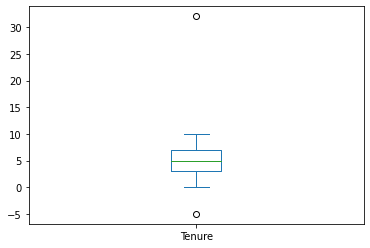

In [73]:
df_bank.Tenure.plot(kind = "box")

In [74]:
df_bank.loc[df_bank.Tenure.notnull(), "Tenure"].astype("str").str[-2:].value_counts()

.0    9922
33       1
Name: Tenure, dtype: int64

Additionally, we face the same issue as with the age, using floats to identify integer based numbers that will be solved too (the `33` are the decimals from the max value identified as the outlier)

In [75]:
# removing negative and very high values with the mean
tenure_mean = round(df_bank.Tenure[(df_bank.Tenure > 0) & (df_bank.Tenure < 30)].mean()) # rounding so we can later convert to int
tenure_mean

5

In [76]:
# filling null values with the mean
df_bank.Tenure.fillna(tenure_mean, inplace = True)

In [77]:
# filling outliers
df_bank.loc[(df_bank.Tenure > 15) | (df_bank.Tenure < 0), "Tenure"] = tenure_mean

<AxesSubplot:>

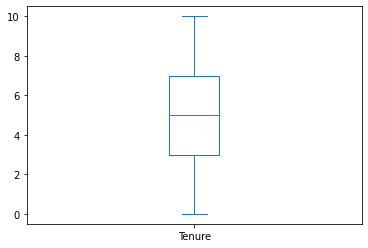

In [78]:
df_bank.Tenure.plot(kind = "box")

<AxesSubplot:>

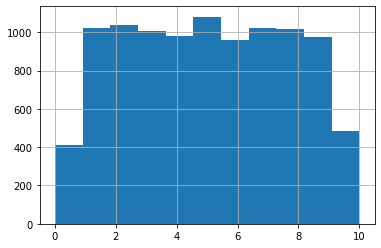

In [79]:
df_bank.Tenure.hist(bins = 11) # using 11 beans to see the values that range from 0 - 10

In [80]:
df_bank.Tenure.value_counts(dropna = False)

5.0     1081
2.0     1039
1.0     1024
7.0     1022
8.0     1017
3.0     1006
4.0      981
9.0      975
6.0      959
10.0     486
0.0      410
Name: Tenure, dtype: int64

In [81]:
# converting data type to int8
df_bank.Tenure = df_bank.Tenure.astype("int8")
df_bank.Tenure.value_counts(dropna = False)

5     1081
2     1039
1     1024
7     1022
8     1017
3     1006
4      981
9      975
6      959
10     486
0      410
Name: Tenure, dtype: int64

In the end, `Tenure` only has 11 possible values, Even if we have integers, these could be treated as a category if we wanted to use ranges of years. However, in this case, we will be treating it as a continuous discrete value.

#### Column `Balance`

##### Analysis and missing values

`Balance` is the amount of money that the customer has in the bank or that they got from a loan. In the end, this is a continous variable.

In [82]:
df_bank.Balance.describe()

count    9.850000e+03
mean     7.672267e+04
std      6.372769e+04
min      0.000000e+00
25%      0.000000e+00
50%      9.724599e+04
75%      1.276414e+05
max      1.036826e+06
Name: Balance, dtype: float64

In [83]:
df_bank.Balance.value_counts(dropna = False)

0.00         3555
NaN           150
105473.74       2
130170.82       2
116969.35       1
             ... 
100471.34       1
95900.04        1
105301.50       1
87842.98        1
161993.89       1
Name: Balance, Length: 6295, dtype: int64

<AxesSubplot:>

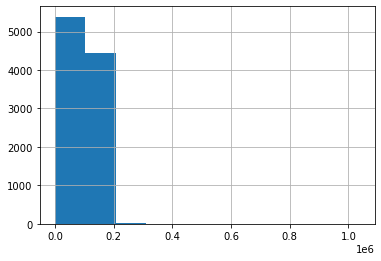

In [84]:
df_bank.Balance.hist()

<AxesSubplot:>

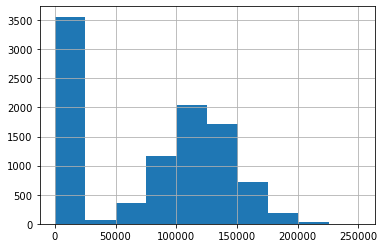

In [85]:
df_bank.Balance[df_bank.Balance < 0.4e6].hist()

By inspecting the histograms we see that there may be quite huge outliers, as in the first histogram, it ranges up to 1.0e6, but all values concentrate below 0.4e6. Plus, we see a lot of values concentrated in the first bin, mainly around 0.0 ((the minimum and the fact that we have 3555 entries with 0.00). Nonetheless, until we use a boxplot to inspect the outliers we won't have more info to go on with what to do with Nulls.

##### Outliers

<AxesSubplot:>

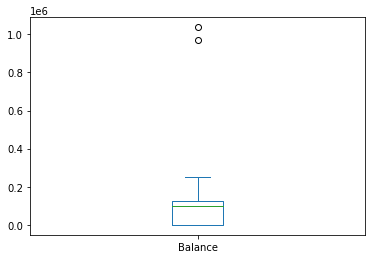

In [86]:
df_bank.Balance.plot(kind = "box")

There are pretty high values that twist the histogram and the boxplot, but the quantities could be right if we inspected both entries (around 1 million). Compared with the other customers these seem to be very rich (or that they owe a lot of money). If we inspect the data further:

In [87]:
df_bank[df_bank.Balance > 0.4e6]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
797,15795540,Reye,556,France,Female,36,2,1.036826e+06,1.0,0.0,1.0,177670.57,0
4456,15704284,Ekechukwu,736,Germany,Male,57,9,9.697802e+05,1.0,1.0,0.0,28434.44,1


These huge outliers can affect any model we want to train, so these need to be removed.

In [88]:
outlier_limits(df_bank, "Balance")

(-191462.12625000003, 319103.54375000007)

In [89]:
balance_mean = df_bank.Balance[df_bank.Balance < 319103.54].mean()
balance_mean

76534.49540312735

In [90]:
df_bank.loc[df_bank.Balance > 319103.54, "Balance"] = balance_mean

In [91]:
df_bank.Balance.fillna(balance_mean, inplace = True)

<AxesSubplot:>

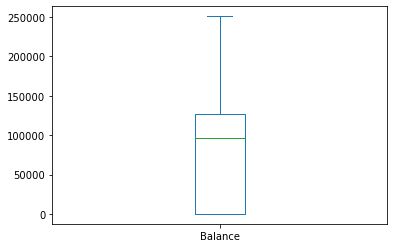

In [92]:
df_bank.Balance.plot(kind = "box")

#### Column `NumOfProducts`

##### Analysis and missing values

`NumOfProducts` refers to the amount of products that the bank customers have. It should be a cardinal integer variable, which, depending on the amount of values it has, it could be treated as categorical.

In [93]:
df_bank.NumOfProducts.value_counts(dropna = False)

 1.00000     4946
 2.00000     4450
 NaN          285
 3.00000      255
 4.00000       58
-2.00000        3
-1.00000        2
 11.17746       1
Name: NumOfProducts, dtype: int64

We can see the following:
- Values are stored as floats, even though we should be dealing with integers. These will need a conversion to an integer
- Some suspected outliers with negative values
- A suspected outlier in 11.17746, as it looks like an incorrect value when compared to the others
- 285 nulls or missing values that will be treated once we detect and remove the outliers

##### Outliers

<AxesSubplot:>

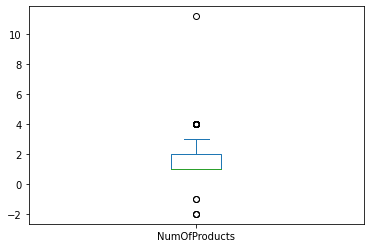

In [94]:
df_bank.NumOfProducts.plot(kind = "box")

Negative values are outliers for sure. The one beyond 10 also looks like one. The number 4 has few but entries so it could be correct, and for the time being we'll keep it

In [95]:
num_of_products_mean = round(df_bank.loc[(df_bank.NumOfProducts > 0) & (df_bank.NumOfProducts < 10), "NumOfProducts"].mean())
num_of_products_mean

2

In [96]:
# fill nulls
df_bank.NumOfProducts.fillna(num_of_products_mean, inplace = True)

In [97]:
# outlier removal
df_bank.loc[(df_bank.NumOfProducts < 0) | (df_bank.NumOfProducts > 10), "NumOfProducts"] = num_of_products_mean

<AxesSubplot:>

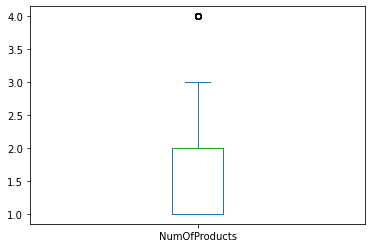

In [98]:
df_bank.NumOfProducts.plot(kind = "box")

Even though there seems to be a suspected outlier in 4, the sample representation on the data set is less than 0.6% of the whole data sample.

In [99]:
# converting all values to int8
df_bank.NumOfProducts = df_bank.NumOfProducts.astype("int8")

In [100]:
df_bank.NumOfProducts.value_counts(dropna = False)

1    4946
2    4741
3     255
4      58
Name: NumOfProducts, dtype: int64

We have from 1 up to 4 products contracted as categories, without the outliers and null values

#### Column `HasCrCard`

##### Analysis and missing values

`HasCrCard` identifies if the bank customer has a credit card or not. It should be a categorical variable with 2 values, `True` and `False`.

In [101]:
df_bank.HasCrCard.value_counts(dropna = False)

1.0    6997
0.0    2924
NaN      79
Name: HasCrCard, dtype: int64

Instead of getting booleans, we are getting integers instead. Plus, there are 79 Null records that don't allow us to set categories, as we may not be able to assign them to any of these as we can't get this info from anywhere in the DataFrame.

Another option would be to drop those rows, but it seems interesting to analyse if the fact of having or not a credit card affects the possibility of customers leaving or not, so we'll keep it.

In [102]:
df_bank.loc[df_bank.HasCrCard.isna()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
338,15807245,McKay,699,Germany,Female,41,1,200117.76,2,NaN,0.0,94142.35,0
482,15803681,Sims,803,France,Female,26,4,0.00,2,NaN,1.0,181208.47,0
498,15803121,Chia,847,France,Male,51,5,97565.74,1,NaN,0.0,144184.06,1
806,15795290,Nikitina,767,France,Female,42,2,133616.39,1,NaN,0.0,28615.80,0
954,15791972,Bergamaschi,748,France,Female,20,7,0.00,2,NaN,0.0,10792.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9446,15580134,Crawford,479,Spain,Male,27,2,172463.45,1,NaN,1.0,40315.27,0
9579,15576623,Outlaw,584,France,Male,31,5,0.00,2,NaN,0.0,31474.27,0
9608,15576022,Nwachinemelu,565,France,Male,38,5,0.00,2,NaN,1.0,80630.32,0
9676,15574206,Shillito,718,France,Female,37,7,0.00,2,NaN,1.0,55100.09,0


Can't remove these 79 entries as they contain other valuable fields. Since we can't infer what should be in the null values, we will create a third category with a Number 2.0, that will represent that we don't know if the customer has a credit card or not. Using a number instead of a string reduces memory usage and makes easier to manipulate data.

In [103]:
df_bank.loc[df_bank.HasCrCard.isna(), "HasCrCard"] = 2.0
df_bank.HasCrCard.value_counts(dropna = False)

1.0    6997
0.0    2924
2.0      79
Name: HasCrCard, dtype: int64

In [104]:
# transforming floats to integers
df_bank.HasCrCard = df_bank.HasCrCard.astype("int8")
df_bank.HasCrCard.head()

0    1
1    1
2    1
3    1
4    0
Name: HasCrCard, dtype: int8

<AxesSubplot:>

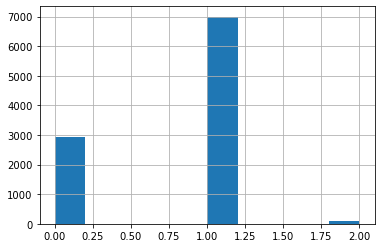

In [105]:
df_bank.HasCrCard.hist()

##### Outliers

No need to analyse outliers for a categorical value

#### Column `IsActiveMember`

##### Analysis and missing values

`IsActiveMember` is a categorical variable that identifies if a member is active or not. We should need to understand a little bit more what the bank understands as active, but this is something we can't infer from the data. We suspected that this could be related to the fact that the customer was still a customer in the bank, but we believe that the `Exited` field will provide this kind of information, so we can identify churn.

In [106]:
df_bank.IsActiveMember.value_counts(dropna = False)

1.0    5105
0.0    4812
NaN      83
Name: IsActiveMember, dtype: int64

In [107]:
df_bank.loc[df_bank.IsActiveMember.isna()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
109,15812917,Kosisochukwu,653,Spain,Male,35,6,116662.96,2,1,NaN,23864.21,0
131,15812470,Allan,719,France,Male,61,5,0.00,2,0,NaN,29132.43,0
520,15802390,Willoughby,724,France,Female,34,2,0.00,2,1,NaN,118863.38,0
565,15801395,Warren,790,France,Female,33,10,135120.72,1,0,NaN,195204.99,0
672,15798895,Okonkwo,525,France,Female,59,6,55328.40,1,1,NaN,83342.73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9346,15583026,Welch,535,France,Female,38,0,135919.33,1,1,NaN,80425.65,0
9368,15582259,Campbell,567,France,Female,37,7,0.00,2,1,NaN,28690.90,0
9672,15574296,Kambinachi,757,France,Male,23,2,80673.96,2,1,NaN,93991.65,0
9771,15571689,Kelechi,740,France,Female,37,5,0.00,2,1,NaN,27528.40,0


After inspecting the data, We will apply the same treatment that we applied to `HasCrCard` for the same reasons

In [108]:
df_bank.loc[df_bank.IsActiveMember.isna(), "IsActiveMember"] = 2.0
df_bank.IsActiveMember = df_bank.IsActiveMember.astype("int8")

In [109]:
df_bank.IsActiveMember.value_counts(dropna = False)

1    5105
0    4812
2      83
Name: IsActiveMember, dtype: int64

<AxesSubplot:>

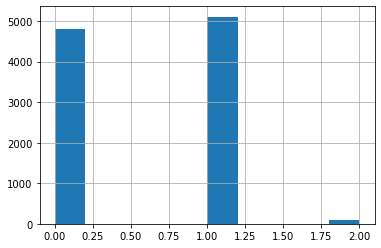

In [110]:
df_bank.IsActiveMember.hist()

##### Outliers

No need to analyse outliers

#### Column `EstimatedSalary`

##### Analysis and missing values

`EstimatedSalary` is a continuous float variable identifying the estimated salary value of each bank customer

In [111]:
df_bank.EstimatedSalary.isna().sum()

43

In [112]:
df_bank.EstimatedSalary.describe()

count      9957.000000
mean     100117.009341
std       57496.773622
min          11.580000
25%       51099.560000
50%      100240.200000
75%      149399.700000
max      199992.480000
Name: EstimatedSalary, dtype: float64

There are 43 null values that we will treat as soon as we review the outliers. From a first inspection to the values, we see a pretty small minimum (11.58) that is a suspected outlier, but nothing more.

##### Outliers

<AxesSubplot:>

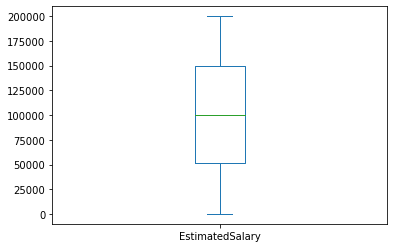

In [113]:
df_bank.EstimatedSalary.plot(kind = "box")

From the boxplot, it seems that there are no outliers outside the range of 1.5 * IQR, so we won't be removing any values. However, we need to fill in the null values with the mean.

In [114]:
estimated_salary_mean = df_bank.EstimatedSalary.mean()
estimated_salary_mean

100117.00934116713

In [115]:
df_bank.EstimatedSalary.fillna(estimated_salary_mean, inplace = True)

#### Column `Exited`

##### Analysis and missing values

`Exited` is a boolean categorical value identifying if the bank customer has churned or not.

In [116]:
df_bank.Exited.value_counts(dropna = False)

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:>

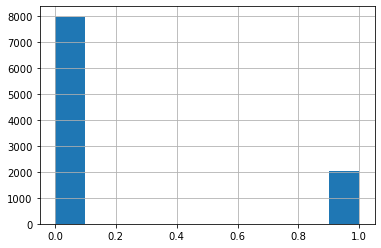

In [117]:
df_bank.Exited.hist()

In [118]:
df_bank.Exited.head()

0    0
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

No need to fill any null values, as they don't exist. 

Another thing to note down is that taking into account that it's a boolean value, they appear encoded as integers, this will be an advantage when transforming categorical values and we'll leave them as they are, but we'll make sure we reduce the memory used to encode them, converting them to int8.

In [119]:
df_bank.Exited = df_bank.Exited.astype('int8')
df_bank.Exited.value_counts(dropna = False)

0    7963
1    2037
Name: Exited, dtype: int64

##### Outliers

No need to analyse outliers in categorical values

#### Final arrangements

Before transforming categorical values and scaling the data set, we will do some reviewing and final checks

In [120]:
df_bank.shape

(10000, 13)

In [121]:
# confirming there are no nulls anywhere in the dataset
df_bank.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [122]:
# reviewing all variable transformations
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int8   
 6   Tenure           10000 non-null  int8   
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int8   
 9   HasCrCard        10000 non-null  int8   
 10  IsActiveMember   10000 non-null  int8   
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int8   
dtypes: float64(2), int64(2), int8(6), object(3)
memory usage: 605.6+ KB


In [123]:
# storing a pre-processed data set for visualization analysis
df_bank.to_csv('./data/churn_data_processed.csv')

### 3 - Categorical variables transformation

A categorical variable is one which defines group membership and is typically arbitrary. For the dataset that we have, having in mind that we are transforming the data in order to use a ML model, we will transform the following categorical variables:
- `CustomerId`: IDs of any kind are usually treated as categorical ([More info on how to treat IDs](https://www.quora.com/Is-ID-categorical-or-numerical))
- `Surname`
- `Geography`
- `Gender`
- `NumOfProducts`
- `HasCrCard`
- `IsActiveMember`
- `Exited`

The criteria we'll be using to transform categorical values are as follows:
- **LabelEncoder** when there's a high-small relationship between the categories (big - medium -small)
- **One Hot encoder** will be the standard unless the number of categories is big, as it will add a lot of columns to our DataFrame
- **Mean Encoding** in case we have a big amount of categories

[More info on why we took that decision](https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/)

In [124]:
from sklearn.preprocessing import OneHotEncoder

#### `CustomerId`

In [125]:
df_bank.CustomerId.nunique()

10000

Due to the high cardinality of the variable, and taking into account that it won't help in grouping several features together, it's been decided to drop this column for the model training ([More information on why using IDs is not a good idea for models](https://stats.stackexchange.com/questions/535931/encoding-id-variables-for-machine-learning/538383#538383?newreg=3c8ab422e8334dc996352ad31d8fc682)). 

IDs are useful for the backend but not for analysis as they are unique and don't allow us to group features together.

In [126]:
df_bank.drop(columns = ['CustomerId'], inplace = True)

#### `Surname`

In [127]:
df_bank.Surname.nunique()

2926

Surnames have a large amount of categories, in order to encode them, we need to use **mean encoding** as **one hot enconding** wouldn't work to the high amount of categories. By using the mean, we get the probability of exiting (`Exit = 1`) for each `Surname`, taking into account that `Exited` can only have 1s or 0s as values.

In [128]:
surnames_mean_encoded = df_bank.groupby("Surname")['Exited'].mean().to_dict()

In [129]:
df_bank.Surname = df_bank.Surname.map(surnames_mean_encoded)
df_bank

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.500000,614,Spain,Female,40,3,113348.50,1,1,1,77789.01,0
1,0.153846,758,France,Female,34,1,154139.45,1,1,1,60728.89,0
2,0.500000,541,Germany,Female,39,9,100116.67,1,1,1,199808.10,1
3,0.200000,481,France,NotSpecified,37,8,152303.66,2,1,1,175082.20,0
4,0.000000,711,France,Female,37,8,113899.92,1,0,0,80215.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.125000,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0
9996,0.142857,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0
9997,0.133333,601,France,Male,47,1,64430.06,2,0,1,96517.97,0
9998,0.285714,612,Spain,Male,35,1,0.00,1,1,1,83256.26,1


In [130]:
df_bank.Surname.value_counts(dropna = False)

0.000000    2929
0.250000     732
0.333333     510
0.500000     502
0.200000     485
            ... 
0.066667      15
0.600000      15
0.266667      15
0.416667      12
0.454545      11
Name: Surname, Length: 72, dtype: int64

<AxesSubplot:>

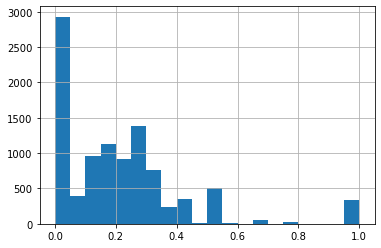

In [131]:
df_bank.Surname.hist(bins = 20)

Even though we used the mean encoding, we see there are 2929 values that map to 0 (around 30% of all the samples we have). Depending on the model used and how skewed the results are, we may need to either remove the rows or don't consider the column at all.

#### `Geography`

In [132]:
df_bank.Geography.value_counts()

France         4924
Germany        2453
Spain          2432
NotReported     191
Name: Geography, dtype: int64

Using **One Hot Encoder** as there are only 4 columns with no relationship between them

In [133]:
reshaped_geography = np.array(df_bank["Geography"]).reshape(len(df_bank), 1)
reshaped_geography

array([['Spain'],
       ['France'],
       ['Germany'],
       ...,
       ['France'],
       ['Spain'],
       ['Spain']], dtype=object)

In [134]:
# using One Hot Encoding as there's no relationship between the different values
geography_encoder = OneHotEncoder(sparse = False)
geography_encoder.fit_transform(reshaped_geography)

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [135]:
geography_encoder.categories_

[array(['France', 'Germany', 'NotReported', 'Spain'], dtype=object)]

In [136]:
temp_df = pd.DataFrame(geography_encoder.fit_transform(reshaped_geography), columns = list("Geography_" + geography_encoder.categories_[0]))
temp_df.head()

,Geography_France,Geography_Germany,Geography_NotReported,Geography_Spain
0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [137]:
temp_df.columns

Index(['Geography_France', 'Geography_Germany', 'Geography_NotReported',
       'Geography_Spain'],
      dtype='object')

In [138]:
df_bank = df_bank.join(temp_df)
df_bank

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_NotReported,Geography_Spain
0,0.500000,614,Spain,Female,40,3,113348.50,1,1,1,77789.01,0,0.0,0.0,0.0,1.0
1,0.153846,758,France,Female,34,1,154139.45,1,1,1,60728.89,0,1.0,0.0,0.0,0.0
2,0.500000,541,Germany,Female,39,9,100116.67,1,1,1,199808.10,1,0.0,1.0,0.0,0.0
3,0.200000,481,France,NotSpecified,37,8,152303.66,2,1,1,175082.20,0,1.0,0.0,0.0,0.0
4,0.000000,711,France,Female,37,8,113899.92,1,0,0,80215.20,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.125000,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0,0.0,1.0,0.0,0.0
9996,0.142857,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0,0.0,1.0,0.0,0.0
9997,0.133333,601,France,Male,47,1,64430.06,2,0,1,96517.97,0,1.0,0.0,0.0,0.0
9998,0.285714,612,Spain,Male,35,1,0.00,1,1,1,83256.26,1,0.0,0.0,0.0,1.0


In [139]:
# dropping Geography as it's not going to be useful anymore
df_bank.drop(columns = "Geography", inplace = True)

In [140]:
# defining a function to reshape arrays for one hot encoding
def one_hot_reshape(df, col):
  return np.array(df[col]).reshape(len(df), 1)

# creating a function for future One Hot Encodings
def one_hot_encode_and_join(df, target_col):
  reshaped = one_hot_reshape(df, target_col)
  encoder = OneHotEncoder(sparse = False)
  encoder.fit_transform(reshaped)
  temp_df = pd.DataFrame(encoder.fit_transform(reshaped),columns = list(target_col + "_" + encoder.categories_[0]))
  return df.join(temp_df), encoder

#### `Gender`

In [141]:
df_bank.Gender.nunique()

3

In [142]:
df_bank.Gender.value_counts(dropna = False)

Male            5307
Female          4419
NotSpecified     274
Name: Gender, dtype: int64

Again, 3 categories with no ordinal relationship between them, **One Hot Encoder** is the way to go

In [143]:
df_bank, gender_encoder = one_hot_encode_and_join(df_bank, "Gender")

In [144]:
df_bank.drop(columns = "Gender", inplace = True)

In [145]:
df_bank

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_NotReported,Geography_Spain,Gender_Female,Gender_Male,Gender_NotSpecified
0,0.500000,614,40,3,113348.50,1,1,1,77789.01,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.153846,758,34,1,154139.45,1,1,1,60728.89,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.500000,541,39,9,100116.67,1,1,1,199808.10,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.200000,481,37,8,152303.66,2,1,1,175082.20,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,711,37,8,113899.92,1,0,0,80215.20,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.125000,745,48,10,96048.55,1,1,0,74510.65,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9996,0.142857,627,30,6,57809.32,1,1,0,188258.49,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9997,0.133333,601,47,1,64430.06,2,0,1,96517.97,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9998,0.285714,612,35,1,0.00,1,1,1,83256.26,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0


#### `NumOfProducts`

In [146]:
df_bank.NumOfProducts.nunique()

4

In [147]:
df_bank.NumOfProducts.value_counts(dropna = False)

1    4946
2    4741
3     255
4      58
Name: NumOfProducts, dtype: int64

We have 4 categories, even though, in this case, there's an ordinal relationship between them. If a customer has 4 products, this means more than 3. And if it has 3, it indeed has more than 2. For this case, we will transform those values as categorical.

In [148]:
df_bank.NumOfProducts = df_bank.NumOfProducts.astype(pd.CategoricalDtype(ordered = True))
df_bank.NumOfProducts.dtype

CategoricalDtype(categories=[1, 2, 3, 4], ordered=True)

#### `HasCrCard`

In [149]:
df_bank.HasCrCard.nunique()

3

In [150]:
df_bank.HasCrCard.value_counts(dropna = False)

1    6997
0    2924
2      79
Name: HasCrCard, dtype: int64

Since we transformed the values into integers in the previous step, we already transformed this field as a category. Since it doesn't have any order relationship we will transform these as categorical values but without any order

In [151]:
df_bank.HasCrCard = df_bank.HasCrCard.astype(pd.CategoricalDtype())
df_bank.HasCrCard.dtypes

CategoricalDtype(categories=[0, 1, 2], ordered=False)

#### `IsActiveMember`

In [152]:
df_bank.IsActiveMember.nunique()

3

In [153]:
df_bank.IsActiveMember.value_counts(dropna = False)

1    5105
0    4812
2      83
Name: IsActiveMember, dtype: int64

Same situation as with `HasCrCard`. Same solution

In [154]:
df_bank.IsActiveMember = df_bank.IsActiveMember.astype(pd.CategoricalDtype())
df_bank.IsActiveMember.dtypes

CategoricalDtype(categories=[0, 1, 2], ordered=False)

#### `Exited`

In [155]:
df_bank.Exited.nunique()

2

In [156]:
df_bank.Exited.value_counts(dropna = False)

0    7963
1    2037
Name: Exited, dtype: int64

Again, this is already a boolean category itself in the format of an integer (True / False)

In [157]:
df_bank.Exited = df_bank.Exited.astype(pd.CategoricalDtype())
df_bank.Exited.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

### 4 - Scaling the data set

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values ([More info on data normalization](https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029))

Since everything is numerical now, after data transformation, we will normalise the whole data set to make sure that we are in the same scale.

However, for the normalisation we'll be mainly looking at the following columns:
- `CreditScore`
- `Age`
- `Tenure`
- `Balance`
- `EstimatedSalary`

In [158]:
df_bank.head()

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_NotReported,Geography_Spain,Gender_Female,Gender_Male,Gender_NotSpecified
0,0.500000,614,40,3,113348.50,1,1,1,77789.01,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.153846,758,34,1,154139.45,1,1,1,60728.89,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.500000,541,39,9,100116.67,1,1,1,199808.10,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.200000,481,37,8,152303.66,2,1,1,175082.20,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,711,37,8,113899.92,1,0,0,80215.20,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [159]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
import matplotlib.pyplot as plt
import math

In [160]:
target = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]

def plot_graphs(df, target_cols, plot_size = (40, 5), num_cols = 5, hist_bins = 11):
  plt.rcParams["figure.figsize"] = plot_size
  # determining num_rows needed
  num_rows = math.ceil(len(target_cols) / num_cols)
  # setting the grid and plotting
  fig = plt.figure(figsize = plot_size)
  for idx, col in enumerate(target_cols):
    axe = fig.add_subplot(num_rows, num_cols, idx + 1)
    df[col].hist(ax = axe, bins = hist_bins)
    axe.set_title(col)

Let's evaluate the 3 different scaling methods we know to see which one is the best: StandardScaler, MinMaxScaler, Normalizer

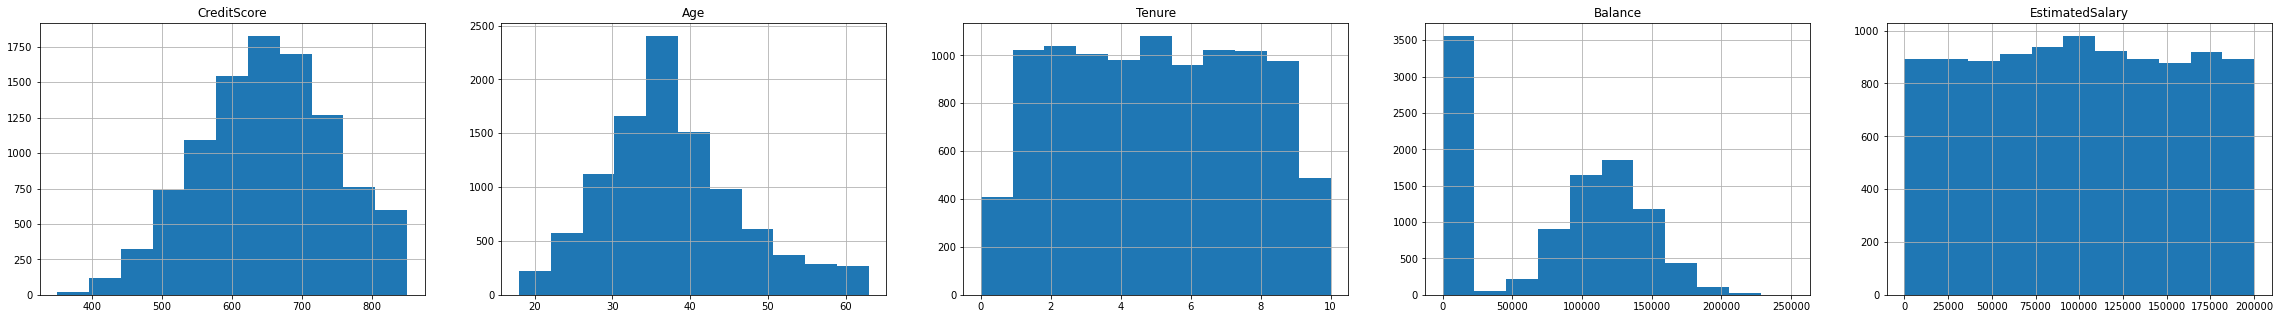

In [161]:
# current data
plot_graphs(df_bank, target, (40, 5), 5)

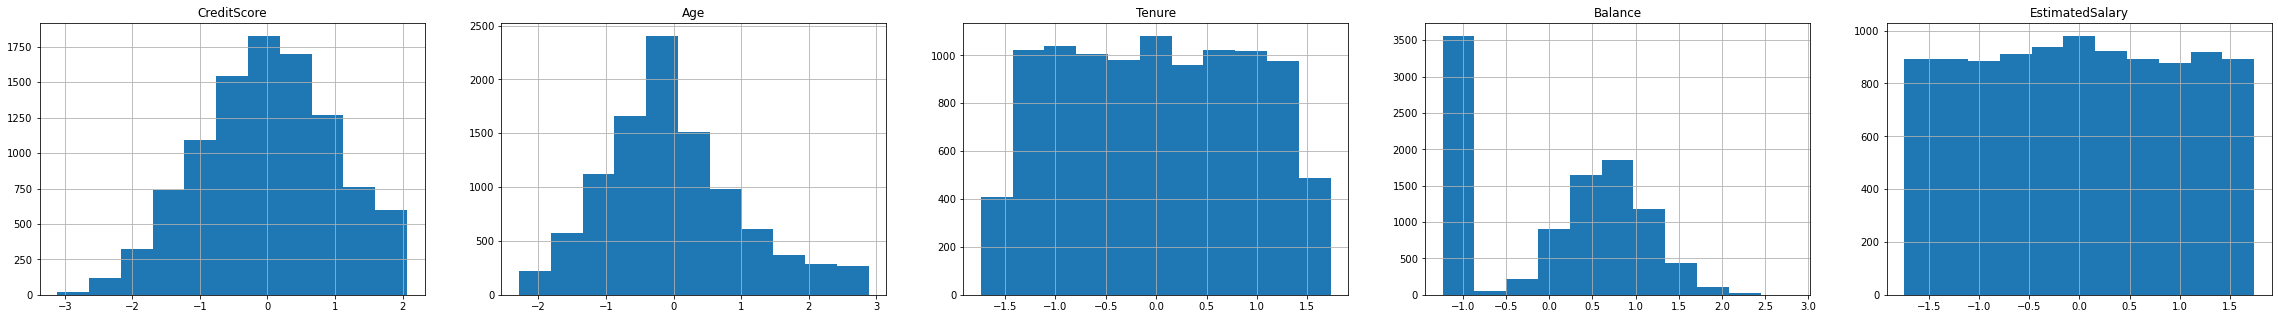

In [162]:
# using the Standard Scaler
scaler = StandardScaler()
standardized = scaler.fit_transform(df_bank)
standard_df = pd.DataFrame(standardized, columns=df_bank.columns)
plot_graphs(standard_df, target)

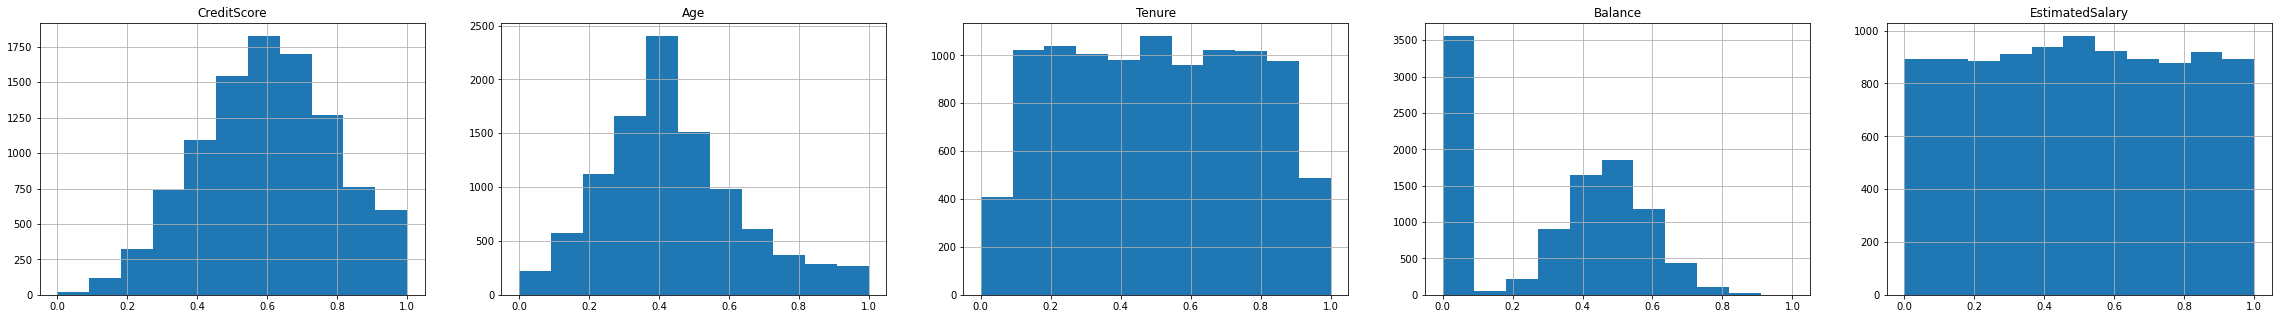

In [163]:
# using MinMax Scaler
scaler = MinMaxScaler()
minmax = scaler.fit_transform(df_bank)
minmax_df = pd.DataFrame(minmax, columns = df_bank.columns)
plot_graphs(minmax_df, target)

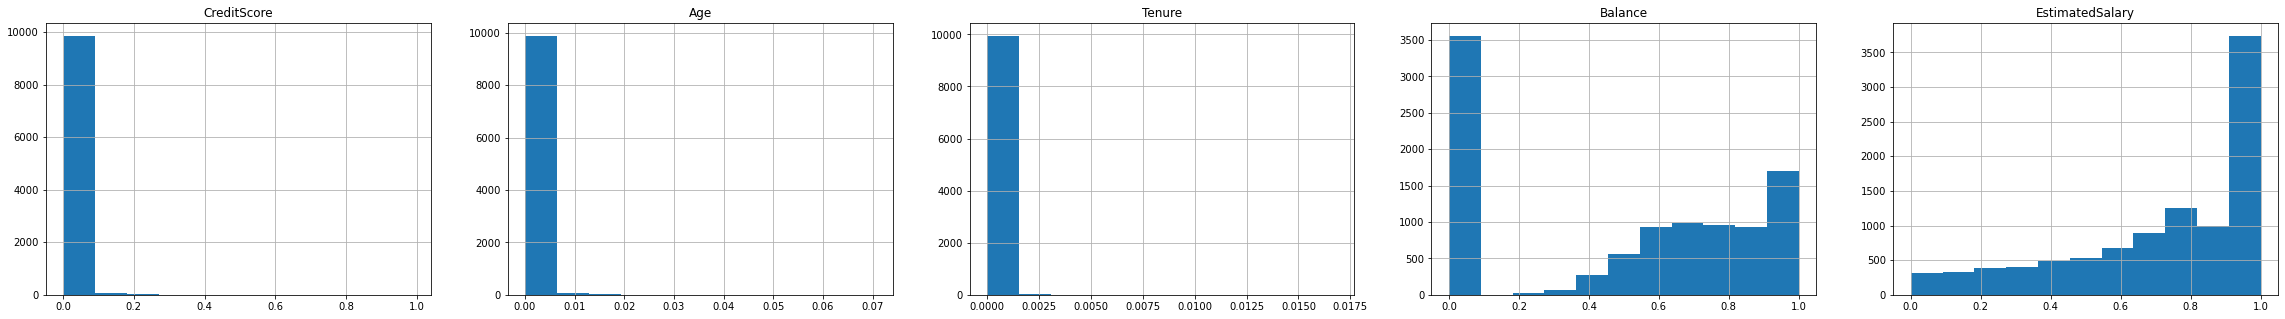

In [164]:
# using Normalizer
scaler = Normalizer()
normalized = scaler.fit_transform(df_bank)
normalized_df = pd.DataFrame(normalized, columns=df_bank.columns)
plot_graphs(normalized_df, target)

At the light of the results, we could either use the Standard Scaler or MinMax, as the shape of the form of the histogram is similar to the originals but in a better scale. The normalizer sets very high peaks in either the maximum or minimum ranges of the data, which may not be useful for a model.

#### Final arrangements

In [165]:
# saving the minmax version inside our dataframe
df_bank = minmax_df.copy()
df_bank

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_NotReported,Geography_Spain,Gender_Female,Gender_Male,Gender_NotSpecified
0,0.500000,0.528,0.488889,0.3,0.451771,0.000000,0.5,0.5,0.388924,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.153846,0.816,0.355556,0.1,0.614351,0.000000,0.5,0.5,0.303616,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.500000,0.382,0.466667,0.9,0.399033,0.000000,0.5,0.5,0.999078,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.200000,0.262,0.422222,0.8,0.607034,0.333333,0.5,0.5,0.875437,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.722,0.422222,0.8,0.453969,0.000000,0.0,0.0,0.401056,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.125000,0.790,0.666667,1.0,0.382819,0.000000,0.5,0.0,0.372531,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9996,0.142857,0.554,0.266667,0.6,0.230410,0.000000,0.5,0.0,0.941324,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9997,0.133333,0.502,0.644444,0.1,0.256798,0.333333,0.0,0.5,0.482578,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9998,0.285714,0.524,0.377778,0.1,0.000000,0.000000,0.5,0.5,0.416263,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [166]:
# storing a transformed and scaled data set for model ingestion
df_bank.to_csv('./data/churn_data_scaled.csv')